# Example of an AR(1) process

In [225]:
using Distributions
using Plots
using Dolo

********** Case 1 : $X \in \mathbb R^2$, $A \in \mathcal M(2,2)$, $B \in \mathcal M(2,2)$ and $\epsilon  \mathcal N(0,I_2)$ **********

In [121]:
A = [0.5 1; -0.2 0.1]
B = [1 2; -1 1]

2×2 Matrix{Int64}:
  1  2
 -1  1

In [122]:
function simulate_next(Xt)
    return A*Xt+B*rand(Normal(0,1),(2,1))
end

function simulate_evolution(X0,T)
    evolution = X0'
    Xt=X0
    for k in 1:T 
        Xt = simulate_next(Xt)
        evolution=vcat(evolution,Xt')
    end
    return evolution
end

simulate_evolution (generic function with 2 methods)

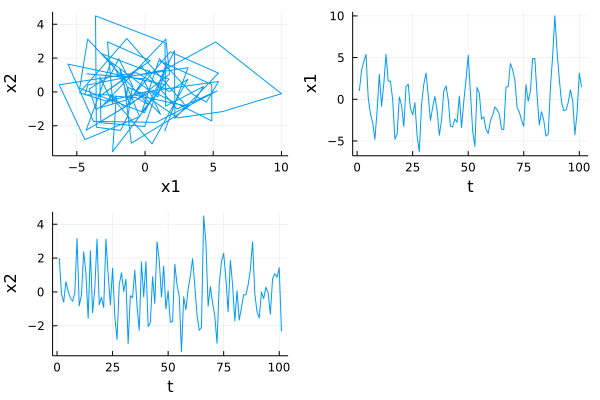

In [123]:
evolution = simulate_evolution(reshape([1.; 2.],2,1),100)
p1 = plot(evolution[:,1],evolution[:,2],xaxis = "x1",yaxis="x2",legend = false)
p2 = plot(evolution[:,1],xaxis = "t",yaxis="x1",legend = false)
p3 = plot(evolution[:,2],xaxis = "t",yaxis="x2",legend = false)
plot(p1,p2,p3)

********** Case 2 : $X \in \mathbb R^{n*2}$, $A \in \mathcal M(n,n)$, $B \in \mathcal M(n,n)$ and $\epsilon$ follows a  $\mathcal N(0,I)$ **********

In [124]:
n=10
A = rand(n,n)
B = rand(n,n)

10×10 Matrix{Float64}:
 0.00539405  0.514499   0.996277  0.943604  …  0.726908   0.238462  0.335444
 0.19843     0.823938   0.326329  0.66283      0.720871   0.673999  0.116961
 0.806389    0.0967398  0.172833  0.534032     0.30306    0.933931  0.739034
 0.00731286  0.587207   0.484446  0.264356     0.732102   0.584374  0.722265
 0.792924    0.143684   0.3061    0.770247     0.272463   0.387068  0.636593
 0.246561    0.737662   0.381075  0.123529  …  0.068996   0.383876  0.937732
 0.993838    0.718556   0.965863  0.376325     0.9908     0.72653   0.466376
 0.630313    0.985313   0.900209  0.296163     0.0966201  0.934464  0.342436
 0.989114    0.117116   0.104256  0.429388     0.740371   0.114965  0.64859
 0.813805    0.60981    0.46623   0.381592     0.523726   0.381289  0.103817

In [136]:
function simulate_next(Xt,n)
    return A*Xt+B*rand(Normal(0,1),(n,2))
end

function simulate_evolution(X0,T,n)
    evolution = reshape(X0,1,n,2)
    Xt=X0
    for k in 1:T 
        Xt = simulate_next(Xt,n)
        evolution = vcat(evolution,reshape(Xt,1,n,2))
    end
    return evolution
end

simulate_evolution (generic function with 2 methods)

In [138]:
evolution2 = simulate_evolution(rand(n,2),15,n)

16×10×2 Array{Float64, 3}:
[:, :, 1] =
     0.708765        0.750458    …      0.862971        0.235297
     3.90591         3.8639             2.36343         1.1924
    18.9153         18.4057            14.6336         15.538
    94.0996         80.4009            75.1756         83.4702
   507.511         448.945            409.238         452.169
  2769.16         2447.16        …   2220.47         2453.24
 15048.0         13308.1            12057.5         13329.4
 81773.2         72333.9            65547.0         72451.6
     4.44468e5       3.93141e5          3.5626e5        3.9379e5
     2.41574e6       2.13678e6          1.93631e6       2.14031e6
     1.31299e7       1.16137e7   …      1.05242e7       1.16329e7
     7.13631e7       6.31225e7          5.72004e7       6.32266e7
     3.8787e8        3.4308e8           3.10893e8       3.43647e8
     2.10813e9       1.8647e9           1.68975e9       1.86777e9
     1.1458e10       1.01349e10         9.18406e9       1.01516e10
   

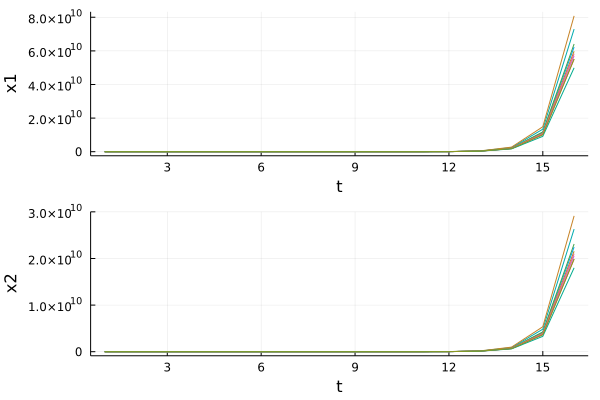

In [146]:
p1 = plot(evolution2[:,:,1],xaxis = "t",yaxis="x1",legend = false)
p2 = plot(evolution2[:,:,2],xaxis = "t",yaxis="x2" , legend = false)
plot(p1,p2,layout = (2,1))

# Testing the possibility to improve simulate

L. 306 in processes.jl, see if it is possible to get the result faster with static vectors.

In [350]:
using StaticArrays
using QuantEcon
using AxisArrays

In [218]:
y0 = SVector{4}(0.5,0.6,0.3,0.2)
ϵ = SVector{2}(0.5,0.4)

R = SMatrix{4,4}(0.1, -0.2, 0.3, -0.4, 0.2, 0.1, -0.3, -0.2, 0.1, 0.2, 0.3, 0.4, -0.6, 0.3, 0.3, -0.1)
s = SMatrix{4,2}(0.1, 0.2, 0.3, 0.4, 0.1, 0.5, -0.3, 0.4)

t0 = time()
y0 = R*y0 + s*ϵ
t1 = time()
t1-t0

0.0003800392150878906

In [186]:
y0 = [0.5,0.6,0.3,0.2]
ϵ = [0.5,0.4]

R = [0.1 -0.2 0.3 -0.4; 0.2 0.1 -0.3 -0.2; 0.1 0.2 0.3 0.4; -0.6 0.3 0.3 -0.1]
s = [0.1 0.2; 0.3 0.4; 0.1 0.5; -0.3 0.4]

t0 = time()
y0 = R*y0 + s*ϵ
t1 = time()
t1-t0


0.00020599365234375

mu::Array{Float64,1}
R::Array{Float64,2}
Sigma::Array{Float64,2}

In [359]:
function simulate_test(var::Dolo.VAR1, x0::MVector{1,Float64}; N::Int, T::Int,
stochastic::Bool=true, irf::Bool=false, e0::Vector{Float64}= zeros(0))

n = size(var.mu, 1)
XN = @MArray zeros(n, N, T)
E = zeros(n, N, T)

if stochastic
    dist = QuantEcon.MVNSampler(zeros(n), var.Sigma)
    for jj in 1:N
        E[:, jj, :] = rand(dist, T)
    end
end

if irf
    E[:, :, 1] = repeat(e0,N,1)
end

E = MArray{Tuple{n, N, T}, Float64, T, n*N*T}(E)

# Initial conditions
for i in 1:N
    XN[:, i, 1] = x0
    for  ii in 1:T-1
        XN[:, i, ii+1] = var.mu+var.R*(XN[:, i, ii]-var.mu)+E[:, i, ii]
    end
end
AxisArray(XN, Axis{:V}(1:n), Axis{:N}(1:N), Axis{:T}(1:T))
end

simulate_test (generic function with 4 methods)

In [360]:
@benchmark simulate_test($Dolo.VAR1(0.0, ones(1,1)), $MVector{1,Float64}(0.37); N=2, T=3,
stochastic=true, irf=false, e0= zeros(0))

BenchmarkTools.Trial: 10000 samples with 5 evaluations.
 Range (min … max):  5.950 μs …  2.619 ms  ┊ GC (min … max): 0.00% … 99.38%
 Time  (median):     6.344 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   7.450 μs ± 36.106 μs  ┊ GC (mean ± σ):  6.81% ±  1.40%

  ▆█▇▅▄▂▁▁                   ▁                               ▂
  █████████████▇▇▇▇▇▇▇▇▇▇▇██████████▇▇▆▆▆▄▅▄▄▅▅▄▄▁▅▅▆▅▄▅▅▆▆▅ █
  5.95 μs      Histogram: log(frequency) by time     17.9 μs <

 Memory estimate: 4.45 KiB, allocs estimate: 72.

In [358]:
@benchmark Dolo.simulate($Dolo.VAR1(0.0, ones(1,1)), $[0.37]; N=2, T=3,
stochastic=true, irf=false, e0= zeros(0))

BenchmarkTools.Trial: 10000 samples with 9 evaluations.
 Range (min … max):  2.245 μs …  1.212 ms  ┊ GC (min … max):  0.00% … 99.53%
 Time  (median):     2.512 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   3.055 μs ± 19.634 μs  ┊ GC (mean ± σ):  11.08% ±  1.72%

  ▄▆█▇▆▆▆▅▃▂▁                                                ▂
  ████████████▇▇▆▆▇▆▆▆▇▆▇▇▇▇▇▆▆▅▆▆▆▆▆▅▅▃▄▅▆▅▆▆▇▆▅▆▆▆▇▆▇▄▅▅▄▅ █
  2.25 μs      Histogram: log(frequency) by time      6.5 μs <

 Memory estimate: 3.83 KiB, allocs estimate: 40.

In [433]:
function simulate_test2(var::Dolo.VAR1, x0::Vector{Float64}; N::Int, T::Int,
stochastic::Bool=true, irf::Bool=false, e0::Vector{Float64}= zeros(0))

n = size(var.mu, 1)
x0 = SVector{n}(x0)#  changed from the earlier version
XN = @MArray zeros(n, N, T)
E = zeros(n, N, T)

if stochastic
    dist = QuantEcon.MVNSampler(zeros(n), var.Sigma)
    for jj in 1:N
        E[:, jj, :] = rand(dist, T)
    end
end

if irf
    E[:, :, 1] = repeat(e0,N,1)
end

E = SArray{Tuple{n, N, T}, Float64, T, n*N*T}(E)

# Initial conditions
for i in 1:N
    XN[:, i, 1] = x0
    for  ii in 1:T-1
        XN[:, i, ii+1] = var.mu+var.R*(XN[:, i, ii]-var.mu)+E[:, i, ii]
    end
end
AxisArray(XN, Axis{:V}(1:n), Axis{:N}(1:N), Axis{:T}(1:T))
end

simulate_test2 (generic function with 2 methods)

In [434]:
@benchmark simulate_test2($Dolo.VAR1(0.0, ones(1,1)), $[0.37]; N=2, T=3,
stochastic=true, irf=false, e0= zeros(0))

BenchmarkTools.Trial: 10000 samples with 5 evaluations.
 Range (min … max):  5.970 μs …  2.684 ms  ┊ GC (min … max): 0.00% … 99.30%
 Time  (median):     6.410 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   7.441 μs ± 36.396 μs  ┊ GC (mean ± σ):  6.87% ±  1.40%

  ▄██▇▅▃▂▁▁                                                  ▂
  ████████████▇▆▆▆▇▇▇▆▆▇▇▇▆▆▆▇▇▇▇█▇▇▇▇▇▆▇▆▆▅▆▅▅▅▄▄▃▄▄▃▃▄▄▄▄▃ █
  5.97 μs      Histogram: log(frequency) by time     16.4 μs <

 Memory estimate: 4.41 KiB, allocs estimate: 71.

In [401]:
function add_initial_state(A :: SVector{L,T}, x,k) where {T,L}
    SVector(ntuple(i->ifelse(i == k, A[i].+x, A[i]), Val{L}()))
end

add_initial_state (generic function with 1 method)

In [428]:
function change_value(A :: SVector{L,T}, t,var,E) where {T,L}
    SVector(ntuple(i->ifelse(i == t+1, var.mu.+var.R.*(A[t].-var.mu).+E[:, :, t], A[i]), Val{L}()))
end

change_value (generic function with 2 methods)

In [430]:
function simulate_test3(var::Dolo.VAR1, x0::Vector{Float64}; N::Int, T::Int,
    stochastic::Bool=true, irf::Bool=false, e0::Vector{Float64}= zeros(0))
    
    n = size(var.mu, 1)
    x0 = SVector{n}(x0)
    XN = SVector{T,SMatrix{n,N}}([@SMatrix zeros(n,N) for j in 1:T])
    E = zeros(n, N, T)
    
    if stochastic
        dist = QuantEcon.MVNSampler(zeros(n), var.Sigma)
        for jj in 1:N
            E[:, jj, :] = rand(dist, T)
        end
    end
    
    if irf
        E[:, :, 1] = repeat(e0,N,1)
    end
    
    E = SArray{Tuple{n, N, T}, Float64, T, n*N*T}(E)
    
    # Initial conditions
    
    add_initial_state(XN,x0,1)
    for  t in 1:T-1
        XN=change_value(XN,t,var,E)
    end
    print(XN)
    #AxisArray(XN, Axis{:V}(1:n), Axis{:N}(1:N), Axis{:T}(1:T))
    end

simulate_test3 (generic function with 1 method)

In [425]:
x0 = [0.37,1]
N=2
T=3
var = Dolo.VAR1(0.0, ones(2,2))
n = size(var.mu, 1)
x0 = SVector{n}(x0)
XN = SVector{T,SMatrix{n,N}}([@SMatrix zeros(n,N) for j in 1:T])
E = zeros(n, N, T)
    

dist = QuantEcon.MVNSampler(zeros(n), var.Sigma)
for jj in 1:N
    E[:, jj, :] = rand(dist, T)
end

    

    
E = SArray{Tuple{n, N, T}, Float64, T, n*N*T}(E)
    
    # Initial conditions
    
add_initial_state(XN,x0,1)
for  t in 1:T-1
    XN=change_value(XN,t)
end
XN

3-element SVector{3, AbstractMatrix{Float64}} with indices SOneTo(3):
 [0.0 0.0; 0.0 0.0]
 [0.5115630581433859 2.2161312827992883; 0.5115630581433859 2.2161312827992883]
 [0.818639595147605 -0.09158171372044194; 0.818639595147605 -0.09158171372044194]

In [431]:
@benchmark simulate_test3($Dolo.VAR1(0.0, ones(2,2)), $[0.37,1]; N=2, T=3,
stochastic=true, irf=false, e0= zeros(0))

BenchmarkTools.Trial: 3500 samples with 1 evaluation.
 Range (min … max):  1.108 ms …  15.105 ms  ┊ GC (min … max): 0.00% … 88.93%
 Time  (median):     1.352 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.419 ms ± 368.374 μs  ┊ GC (mean ± σ):  0.52% ±  2.12%

          ▃█▆▃▂▁                                               
  ▂▁▂▂▃▅▄▄████████▇▇▆▇▅▆▆▅▅▆▅▄▅▄▄▄▄▄▄▃▄▃▃▃▃▃▃▂▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂ ▄
  1.11 ms         Histogram: frequency by time        2.03 ms <

 Memory estimate: 56.69 KiB, allocs estimate: 830.